In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os, gzip, cPickle, sys

from matplotlib import rc
rc('font', family = 'serif', serif = 'Times')
rc('text', usetex = True)

import seaborn as sns
sns.set_style("white", {'grid.color': '.0', 'grid.linestyle': '',\
                            'axes.grid': True,\
                            'xtick.direction': 'in',\
                            'xtick.major.size': 10,\
                            'xtick.minor.size': 10,\
                            'ytick.direction': 'in',\
                            'ytick.major.size': 10,\
                            'ytick.minor.size': 10,\
                            'xtick.label.size': 30,\
                            'xlabel.size': 30,\
                            'ylabel.size': 20,})

from matplotlib import rc
rc('font', family = 'serif', serif = 'Times')
rc('text', usetex = True)

a pdf TWT
a pdf PRL
a pdf PRE
a pdf PRD
a pdf PRB
a pdf PRA
a pdf MPC
a cdf TWT
a cdf PRL
a cdf PRE
a cdf PRD
a cdf PRB
a cdf PRA
a cdf MPC
k pdf TWT
k pdf PRL
k pdf PRE
k pdf PRD
k pdf PRB
k pdf PRA
k pdf MPC
k cdf TWT
k cdf PRL
k cdf PRE
k cdf PRD
k cdf PRB
k cdf PRA
k cdf MPC


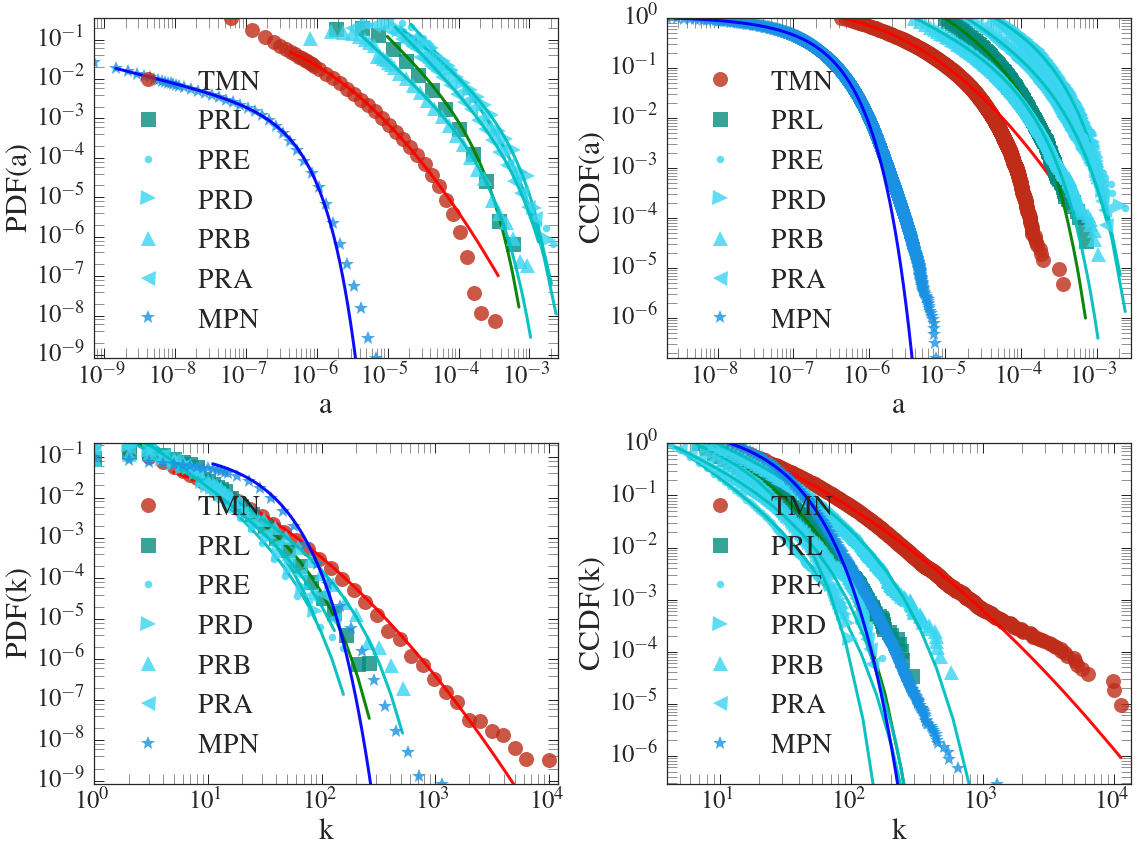

In [15]:
RootFold = '/home/ubi/DATA_PhD/TVN-ST/py/out/Calcolo/Auto_bins/'

DictFold = {\
            'MPC': {'name': 'MPN', 'beta': 1.200, 'NEv': 1381304499., 'dist': 'truncated', 'ms':'*', 'mc':'#1a91e2', 'lc':'b'},\
            'TWT': {'name': 'TMN', 'beta': .4749, 'NEv': 16329466., 'dist': 'lognormal', 'ms':'o', 'mc':'#bf2d19', 'lc':'r'},\
            'PRA': {'name': 'PRA', 'beta': .2049, 'NEv': 314556., 'dist': 'truncated', 'ms':'<', 'mc':'#39d5f1', 'lc':'c'},\
            'PRB': {'name': 'PRB', 'beta': .1249, 'NEv': 1267784., 'dist': 'truncated', 'ms':'^', 'mc':'#39d5f1', 'lc':'c'},\
            'PRD': {'name': 'PRD', 'beta': .2849, 'NEv': 198296., 'dist': 'truncated', 'ms':'>', 'mc':'#39d5f1', 'lc':'c'},\
            'PRE': {'name': 'PRE', 'beta': .2549, 'NEv': 188650., 'dist': 'truncated', 'ms':'.', 'mc':'#39d5f1', 'lc':'c'},\
            'PRL': {'name': 'PRL', 'beta': .1549, 'NEv': 812538.0, 'dist': 'truncated', 'ms':'s', 'mc':'#068c7f', 'lc':'g'},\
            }

Labels = {'a': {'name': 'Activity'}, 'k': {'name': 'Degree'}}
DensFu = {'pdf': {'yl': 'PDF', 'ylab': {'a':'F', 'k':r'$\rho$'}},\
          'cdf': {'yl': 'CCDF', 'ylab': {'a': 'CDF', 'k': 'CDF'}}}

f = plt.figure(figsize=(16,12))
ax_aP = f.add_subplot(221)
ax_aC = f.add_subplot(222)
ax_kP = f.add_subplot(223)
ax_kC = f.add_subplot(224)

Axes = {'a': {'pdf': ax_aP, 'cdf': ax_aC}, 'k': {'pdf': ax_kP, 'cdf': ax_kC}}

#os.chdir(RootFold);

AXProp = {}

for what, wdict in sorted(Labels.items()):
    AXProp.setdefault(what, {})
    for how, hdict in sorted(DensFu.items(), reverse=True):      
        AXProp[what].setdefault(how, {'ylim': [10, -2], 'xlim': [100, 0]})
        tmpax = Axes[what][how]
        #tmpax.set_title('%s %s' % (wdict['name'], hdict['yl']), size=30)
        
        for Fold, Fdict in sorted(DictFold.items(), reverse=True):
            DATA = np.load(\
                os.path.join(RootFold, '%s/00/rhos/Ultima/%s/%s_%s.npz' %\
                             (Fold, what, Fdict['dist'], hdict['yl'])))
            
            XX_d = DATA['x_d']
            XX_a = DATA['x_a']
            
            Continue = False
            if what == 'a' and True:
                Continue = True
                XX_d /= Fdict['NEv']
                XX_a /= Fdict['NEv']

            tmpax.loglog(XX_d, DATA['y_d'],\
                         linestyle='', marker=Fdict['ms'], alpha=.8, color=Fdict['mc'], ms=15,\
                         label=Fdict['name'])
            
            if Fold == 'TWT' and what == 'k' and how == 'pdf':
                low_cut = 4
                tmpax.loglog(XX_a[low_cut:], DATA['y_a'][low_cut:], '-', color=Fdict['lc'], alpha=.95, lw=3)
            else:
                tmpax.loglog(XX_a, DATA['y_a'], '-', color=Fdict['lc'], alpha=.95, lw=3)

            if DATA['y_d'].min() < AXProp[what][how]['ylim'][0] and DATA['y_d'].min() > 1e-10:
                AXProp[what][how]['ylim'][0] = DATA['y_d'].min()
            if DATA['y_d'].max() > AXProp[what][how]['ylim'][1]:
                AXProp[what][how]['ylim'][1] = DATA['y_d'].max()

            if XX_d.min() < AXProp[what][how]['xlim'][0]:
                AXProp[what][how]['xlim'][0] = XX_d.min()
            if XX_d.max() > AXProp[what][how]['xlim'][1]:
                AXProp[what][how]['xlim'][1] = XX_d.max()*1.2
                
                
            # Doing the same for the single figure...
            tfg = plt.figure(figsize=(6,4.5))
            tax = tfg.add_subplot(111)
            
            
            data_color = '#1A91E2'
            data_color = '#8CBBEA'
            
            pred_color = '#1A91E2'
            pred_color = '#bf2d19'
            
            tax.loglog(XX_d, DATA['y_d'], 'o', alpha=.9, color=data_color, ms=14)
            if False:#Fold == 'TWT' and what == 'k' and how == 'pdf':
                tax.loglog(XX_a[low_cut:], DATA['y_a'][low_cut:], '-', alpha=.9, color=pred_color, lw=4)
            #elif Fold == 'MPC' and what == 'k':
            #    tax.loglog(XX_a, DATA['y_a'], '-', alpha=.9, color='#206584', lw=4)
            else:
                tax.loglog(XX_a, DATA['y_a'], '-', alpha=.9, color=pred_color, lw=4)
            
            
            
            tax.set_ylim([max(1e-8,DATA['y_d'].min()*.7), DATA['y_d'].max()])
            tax.set_xlim([XX_d.min()*1.75, XX_d.max()*1.2])
            
            if False: # Zoomed CDFs and PDFs...
                if Fold == 'TWT' and what == 'a' and how == 'cdf':
                    tax.set_ylim(1e-3, 1.)
                    if Continue:
                        tax.set_xlim(7/Fdict['NEv'], 1e+3/Fdict['NEv'])
                    else:
                        tax.set_xlim(7, 1e+3)
                elif Fold == 'TWT' and what == 'a' and how == 'pdf':
                    tax.set_ylim(1e-5, 1e-1)
                    if Continue:
                        tax.set_xlim(6/Fdict['NEv'], 1e+3/Fdict['NEv'])
                    else:
                        tax.set_xlim(6, 1e+3)
                elif Fold == 'TWT' and what == 'k' and how == 'cdf':
                    tax.set_ylim(1e-3, 1.)
                    if Continue:
                        tax.set_xlim(4/Fdict['NEv'], 1e+3/Fdict['NEv'])
                    else:
                        tax.set_xlim(4, 1e+3)
                elif Fold == 'TWT' and what == 'k' and how == 'pdf':
                    tax.set_ylim(1e-7, 1e-1)
                    if Continue:
                        tax.set_xlim(5/Fdict['NEv'], 1e+3/Fdict['NEv'])
                    else:
                        tax.set_xlim(5, 1e+3)
                        
                elif Fold == 'MPC' and what == 'a' and how == 'cdf':
                    tax.set_ylim(1e-3, 1.)
                    if Continue:
                        tax.set_xlim(3/Fdict['NEv'], 5e+3/Fdict['NEv'])  
                    else:
                        tax.set_xlim(3, 5e+3)  
                elif Fold == 'MPC' and what == 'a' and how == 'pdf':
                    tax.set_ylim(1e-6, 2e-2)
                    if Continue:
                        tax.set_xlim(3/Fdict['NEv'], 5e+3/Fdict['NEv'])
                    else:
                        tax.set_xlim(3, 5e+3)

                elif Fold == 'PRA' and what == 'a' and how == 'cdf':
                    tax.set_ylim(1e-3, 1.)
                    if Continue:
                        tax.set_xlim(6/Fdict['NEv'], 4e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(6, 4e+2)
                elif Fold == 'PRA' and what == 'a' and how == 'pdf':
                    tax.set_ylim(1e-6, 2e-1)
                    if Continue:
                        tax.set_xlim(6/Fdict['NEv'], 4e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(6, 4e+2)
                elif Fold == 'PRA' and what == 'k' and how == 'cdf':
                    tax.set_ylim(1e-3, 1.)
                    if Continue:
                        tax.set_xlim(4/Fdict['NEv'], 2e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(4, 2e+2)
                elif Fold == 'PRA' and what == 'k' and how == 'pdf':
                    tax.set_ylim(5e-6, 3e-1)
                    if Continue:
                        tax.set_xlim(4/Fdict['NEv'], 2e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(4, 2e+2)

                elif Fold == 'PRB' and what == 'a' and how == 'cdf':
                    tax.set_ylim(1e-3, 1.)
                    if Continue:
                        tax.set_xlim(4/Fdict['NEv'], 6e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(4, 6e+2)
                elif Fold == 'PRB' and what == 'a' and how == 'pdf':
                    tax.set_ylim(1e-5, 2e-1)
                    if Continue:
                        tax.set_xlim(4/Fdict['NEv'], 6e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(4, 6e+2)
                elif Fold == 'PRB' and what == 'k' and how == 'cdf':
                    tax.set_ylim(1e-3, 1.)
                    if Continue:
                        tax.set_xlim(6/Fdict['NEv'], 3e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(6, 3e+2)
                elif Fold == 'PRB' and what == 'k' and how == 'pdf':
                    tax.set_ylim(5e-6, 1e-1)
                    if Continue:
                        tax.set_xlim(6/Fdict['NEv'], 3e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(6, 3e+2)

                elif Fold == 'PRD' and what == 'a' and how == 'cdf':
                    tax.set_ylim(1e-3, 1.)
                    if Continue:
                        tax.set_xlim(7/Fdict['NEv'], 3e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(7, 3e+2)
                elif Fold == 'PRD' and what == 'a' and how == 'pdf':
                    tax.set_ylim(1e-5,2e-1)
                    if Continue:
                        tax.set_xlim(6/Fdict['NEv'], 3e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(6, 3e+2)
                elif Fold == 'PRD' and what == 'k' and how == 'cdf':
                    tax.set_ylim(1e-3, 1.)
                    if Continue:
                        tax.set_xlim(5.5/Fdict['NEv'], 1e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(5.5, 1e+2)
                elif Fold == 'PRD' and what == 'k' and how == 'pdf':
                    tax.set_ylim(1e-5, 1e-1)
                    if Continue:
                        tax.set_xlim(5/Fdict['NEv'], 1e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(5, 1e+2)

                elif Fold == 'PRE' and what == 'a' and how == 'cdf':
                    tax.set_ylim(1e-3, 1.)
                    if Continue:
                        tax.set_xlim(7/Fdict['NEv'], 2e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(7, 2e+2)
                elif Fold == 'PRE' and what == 'a' and how == 'pdf':
                    tax.set_ylim(1e-5,2e-1)
                    if Continue:
                        tax.set_xlim(6/Fdict['NEv'], 2e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(6, 2e+2)
                elif Fold == 'PRE' and what == 'k' and how == 'cdf':
                    tax.set_ylim(1e-3, 1.)
                    if Continue:
                        tax.set_xlim(5.5/Fdict['NEv'], 1e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(5.5, 1e+2)
                elif Fold == 'PRE' and what == 'k' and how == 'pdf':
                    tax.set_ylim(1e-5, 1e-1)
                    if Continue:
                        tax.set_xlim(4/Fdict['NEv'], 1e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(4, 1e+2)

                elif Fold == 'PRL' and what == 'a' and how == 'cdf':
                    tax.set_ylim(1e-3, 1.)
                    if Continue:
                        tax.set_xlim(7/Fdict['NEv'], 4e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(7, 4e+2)
                elif Fold == 'PRL' and what == 'a' and how == 'pdf':
                    tax.set_ylim(1e-5,2e-1)
                    if Continue:
                        tax.set_xlim(7/Fdict['NEv'], 4e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(7, 4e+2)
                elif Fold == 'PRL' and what == 'k' and how == 'cdf':
                    tax.set_ylim(1e-3, 1.)
                    if Continue:
                        tax.set_xlim(6/Fdict['NEv'], 2e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(6, 2e+2)
                elif Fold == 'PRL' and what == 'k' and how == 'pdf':
                    tax.set_ylim(.7e-5, 1e-1)
                    if Continue:
                        tax.set_xlim(6/Fdict['NEv'], 2e+2/Fdict['NEv'])
                    else:
                        tax.set_xlim(6, 2e+2)

            
            tax.tick_params(axis='both', which='major', labelsize=25)
            tax.set_xlabel(wdict['name']+'  '+what, size=30)
            tax.set_ylabel(hdict['ylab'][what]+'(%s)'%what, size=30)
            
            tfg.tight_layout()
            tfg.savefig(os.path.join(RootFold,\
                '%s/00/rhos/Ultima/%s/%s_%s_fig.pdf' % (Fold, what, Fdict['dist'], hdict['yl'])), bbox_inches='tight')
            tfg.clear()
            plt.close(tfg)
            
            print what, how, Fold

        tmpax.set_ylim(AXProp[what][how]['ylim'])
        tmpax.set_xlim(AXProp[what][how]['xlim'])
        tmpax.legend(loc=3, fontsize=28)
        tmpax.tick_params(axis='both', which='major', labelsize=25)
        tmpax.set_xlabel(what, size=30)
        tmpax.set_ylabel(hdict['yl']+'(%s)'%what, size=30)
        
            
            

f.tight_layout()
f.savefig('PCDF.pdf', bbox_inches='tight')

In [13]:
l = [.0, .1, .2, 1., 10.]
np.percentile(l, 90)

6.4000000000000004

In [56]:
t=tmpax.get_yticklabels()[0]

In [57]:
2.586 - np.log(16329466)

-14.02248176386084

In [58]:
2.77e-3*DictFold['MPC']['NEv']

3826213.4622299997